<a href="https://colab.research.google.com/github/niharich/Assignment4_NNDL/blob/main/encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                              

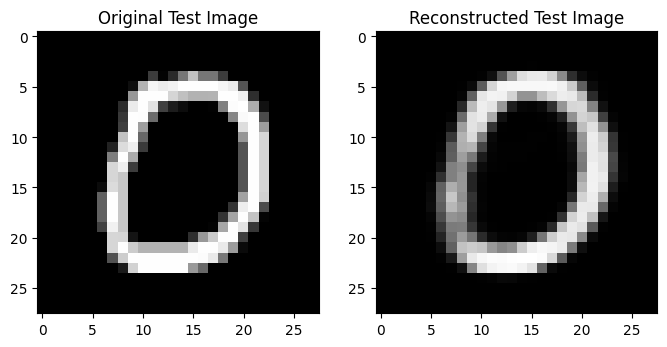

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the data
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
# Adding one more hidden layer
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder.summary()

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Make predictions on the test data
reconstructed_images = autoencoder.predict(x_test)

# Visualize one of the reconstructed images
plt.figure(figsize=(8, 4))
idx_to_visualize = 10  # Choose the index of the test data to visualize
plt.subplot(1, 2, 1)
plt.imshow(x_test[idx_to_visualize].reshape(28, 28), cmap='gray')
plt.title('Original Test Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_images[idx_to_visualize].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Test Image')
plt.show()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               1011

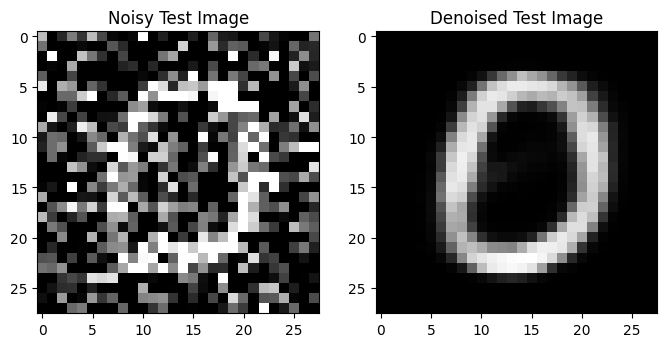

In [2]:
# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoising autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

denoising_autoencoder = Model(input_img, decoded)

denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

denoising_autoencoder.summary()

# Train the denoising autoencoder
denoising_autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# Make predictions on the noisy test data
denoised_images = denoising_autoencoder.predict(x_test_noisy)

# Visualize one of the denoised images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[idx_to_visualize].reshape(28, 28), cmap='gray')
plt.title('Noisy Test Image')
plt.subplot(1, 2, 2)
plt.imshow(denoised_images[idx_to_visualize].reshape(28, 28), cmap='gray')
plt.title('Denoised Test Image')
plt.show()


Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1001 - accuracy: 0.0123 - val_loss: 0.0983 - val_accuracy: 0.0120
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0988 - accuracy: 0.0122 - val_loss: 0.0971 - val_accuracy: 0.0120
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0975 - accuracy: 0.0121 - val_loss: 0.0960 - val_accuracy: 0.0143
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0963 - accuracy: 0.0118 - val_loss: 0.0952 - val_accuracy: 0.0128
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0951 - accuracy: 0.0126 - val_loss: 0.0938 - val_accuracy: 0.0140
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0941 - accuracy: 0.0121 - val_loss: 0.0927 - val_accuracy: 0.0144
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0931 - accuracy: 0.0122 - val_loss: 0.0916 - val_accuracy: 0.0146

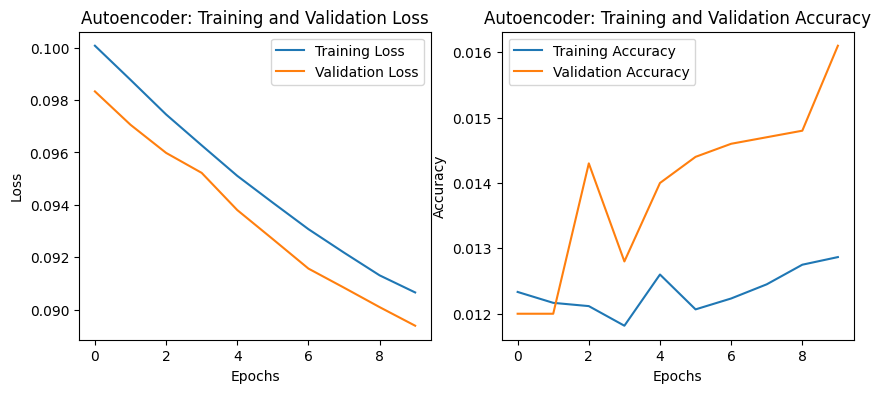

In [3]:
# Train the autoencoder and store the history object
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Plot loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder: Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Autoencoder: Training and Validation Accuracy')

plt.show()
